In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

countries = ['AT', 'BE', 'CZ', 'DE_LU', 'FR', 'HR', 'HU', 'NL', 'PL', 'RO', 'SI', 'SK']

In [2]:
df_observed = pd.read_excel("./data/net_positions.xlsx", index_col=0)

# February
start_date_feb = pd.Timestamp('20230201')
end_date_feb = pd.Timestamp('20230301')

df_observed_february = df_observed.loc[(df_observed.index > start_date_feb) & (df_observed.index <= end_date_feb)]

df_forecasts_february = []

df_forecasts_february.append(pd.read_excel("./np_forecasts/np_forecast_full_norm_1_w_atc_february.xlsx"))
df_forecasts_february.append(pd.read_excel("./np_forecasts/np_forecast_full_nuts_norm_1_w_atc_february.xlsx"))
df_forecasts_february.append(pd.read_excel("./np_forecasts/np_forecast_full_alpha5_norm_1_w_atc_february.xlsx"))

for index, df in enumerate(df_forecasts_february):
    df_forecasts_february[index].index = df_observed_february.index

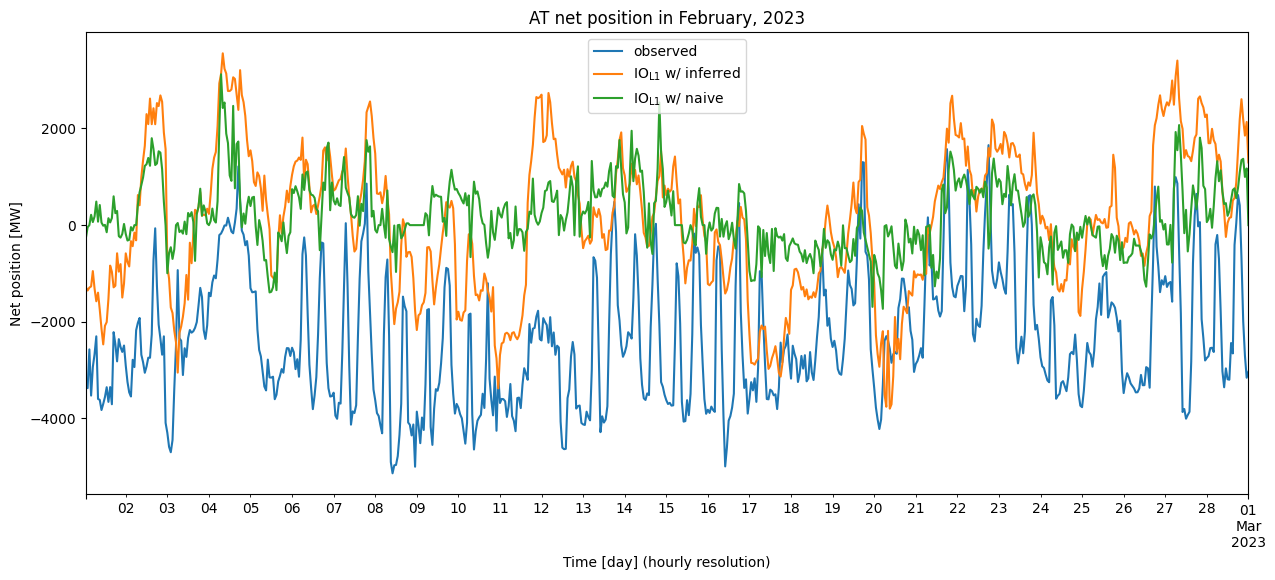

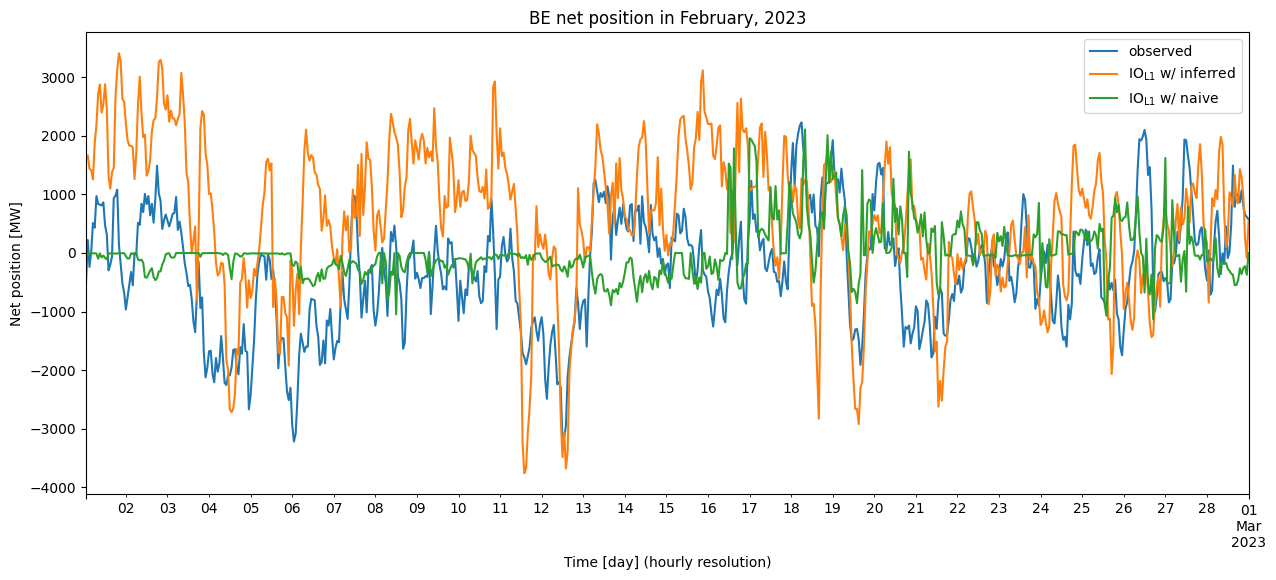

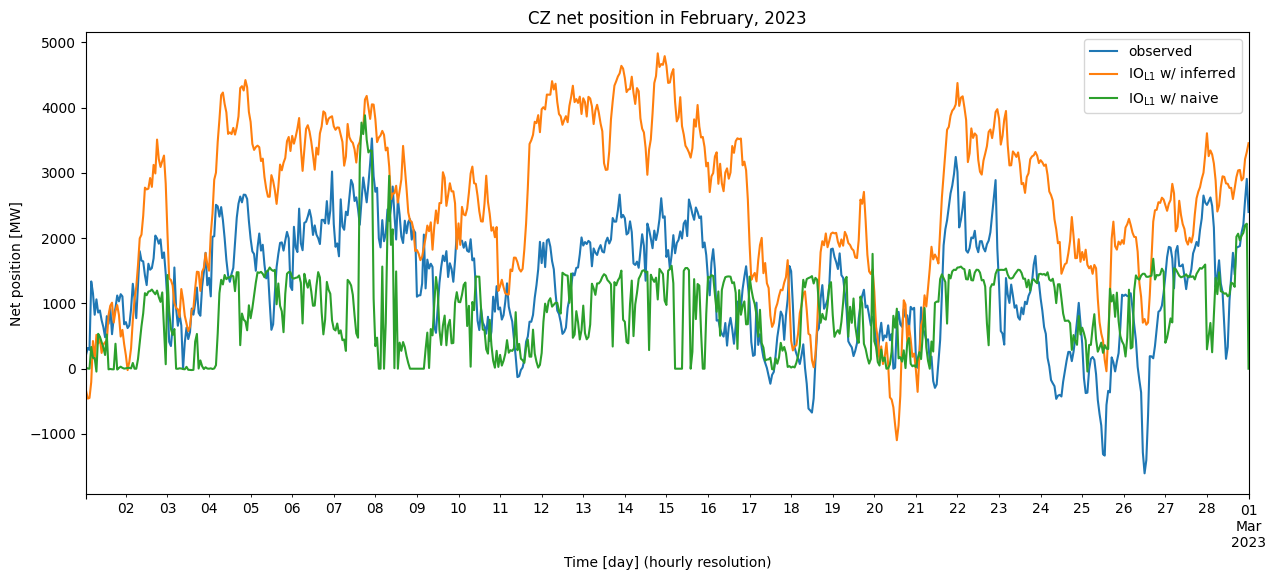

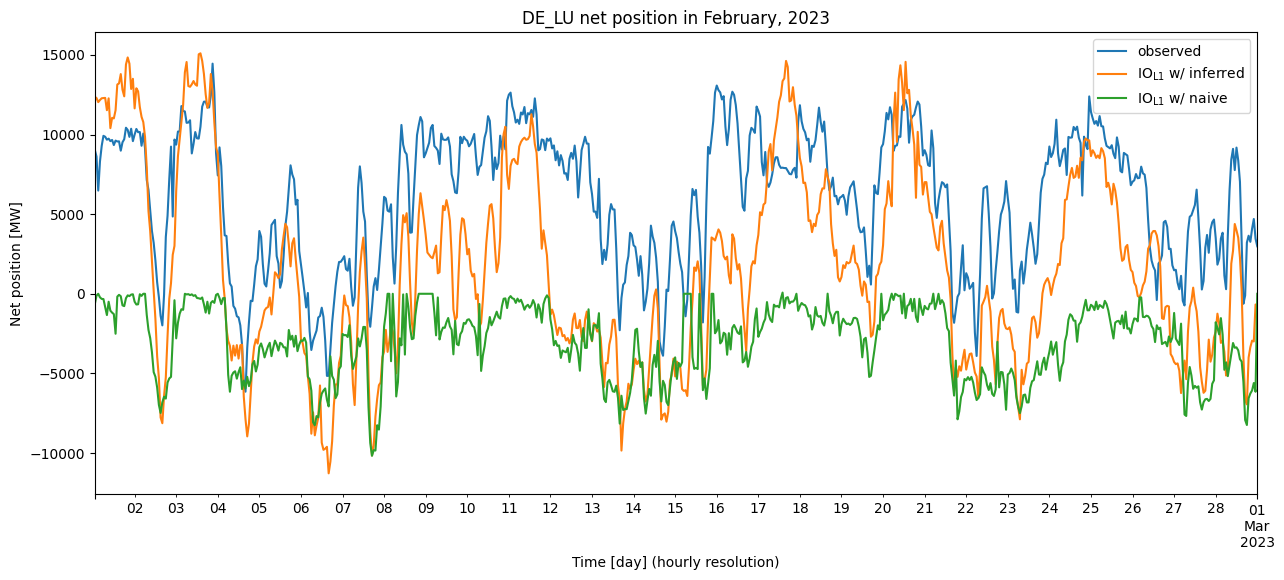

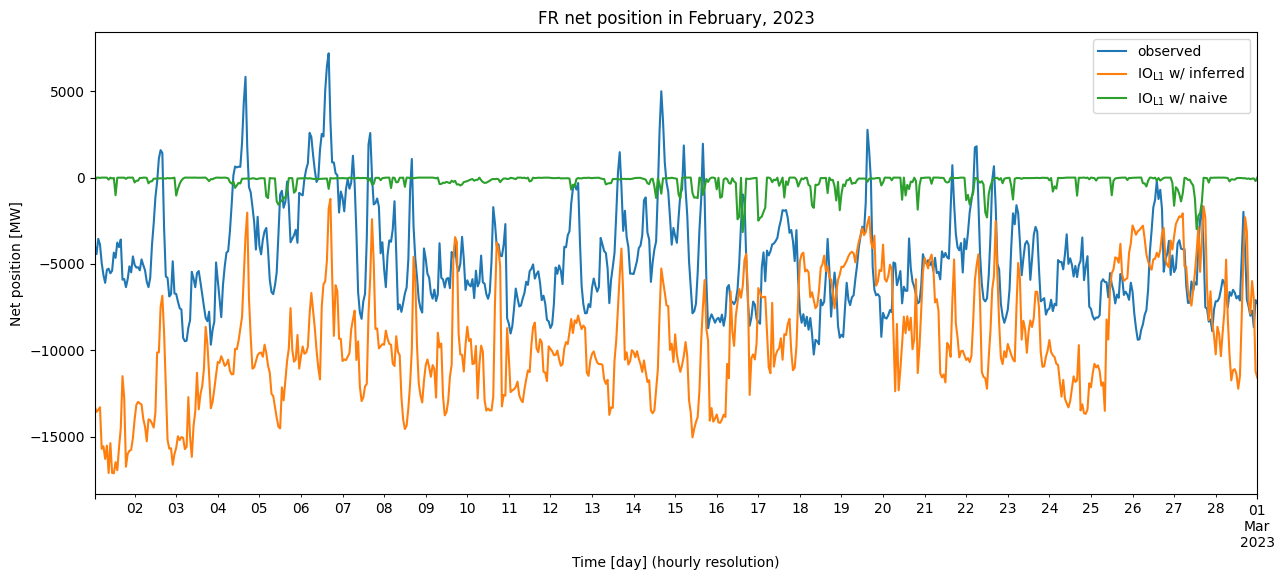

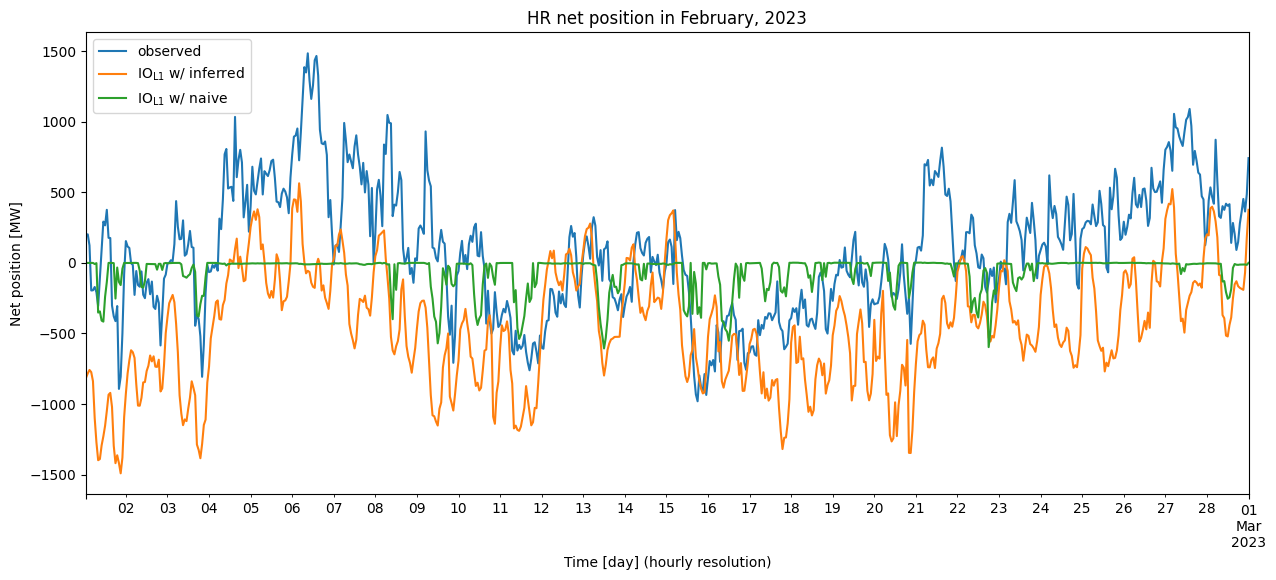

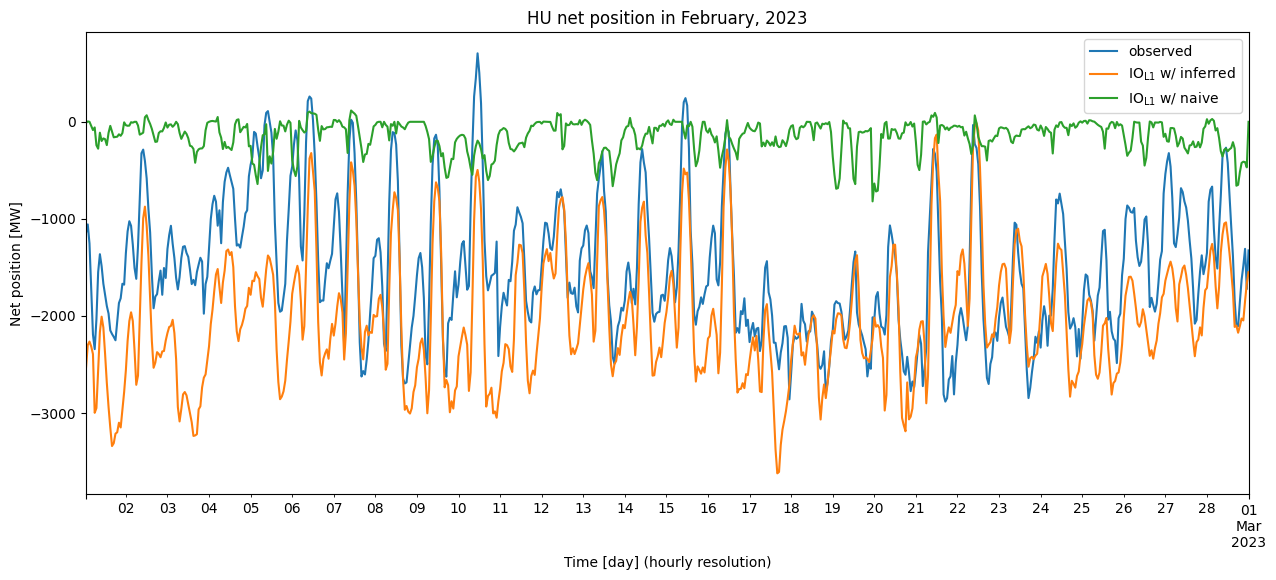

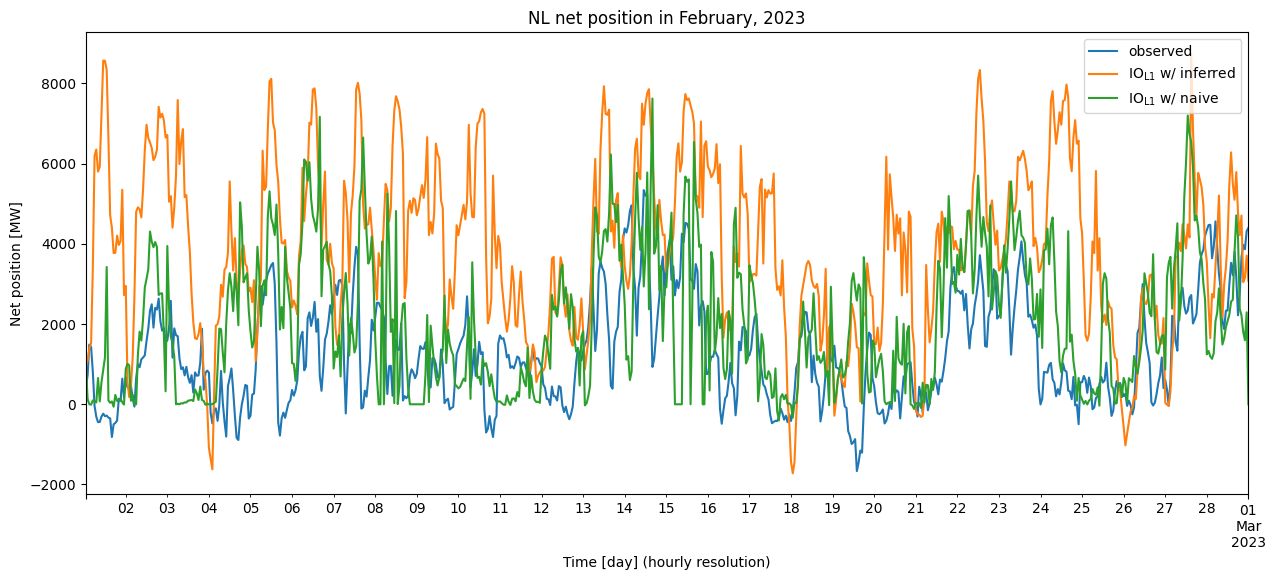

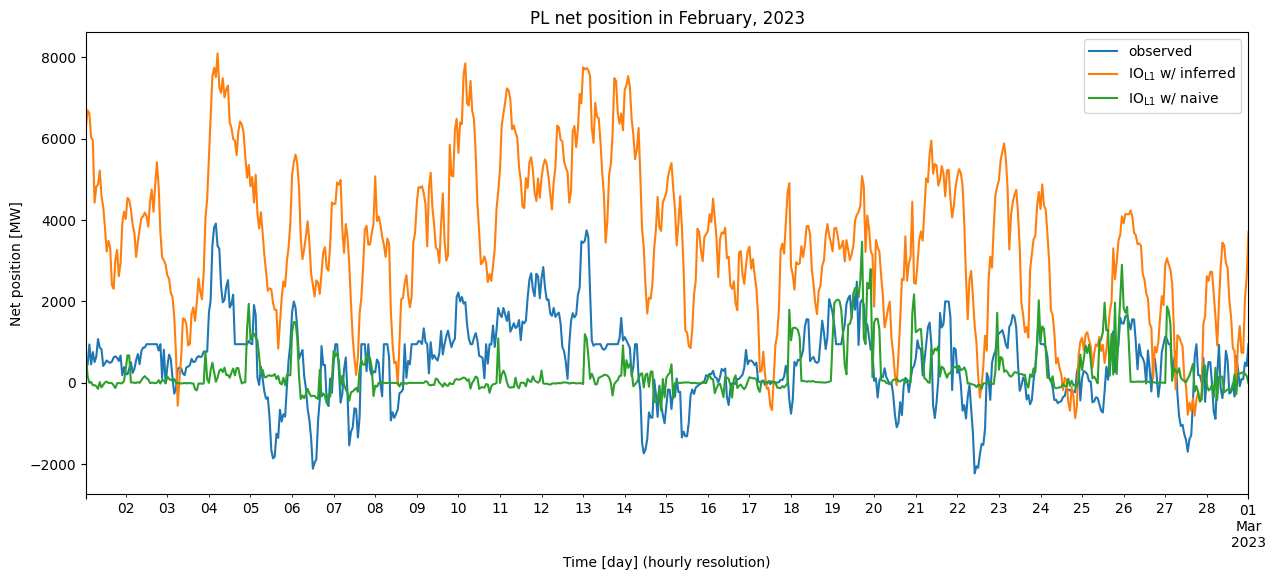

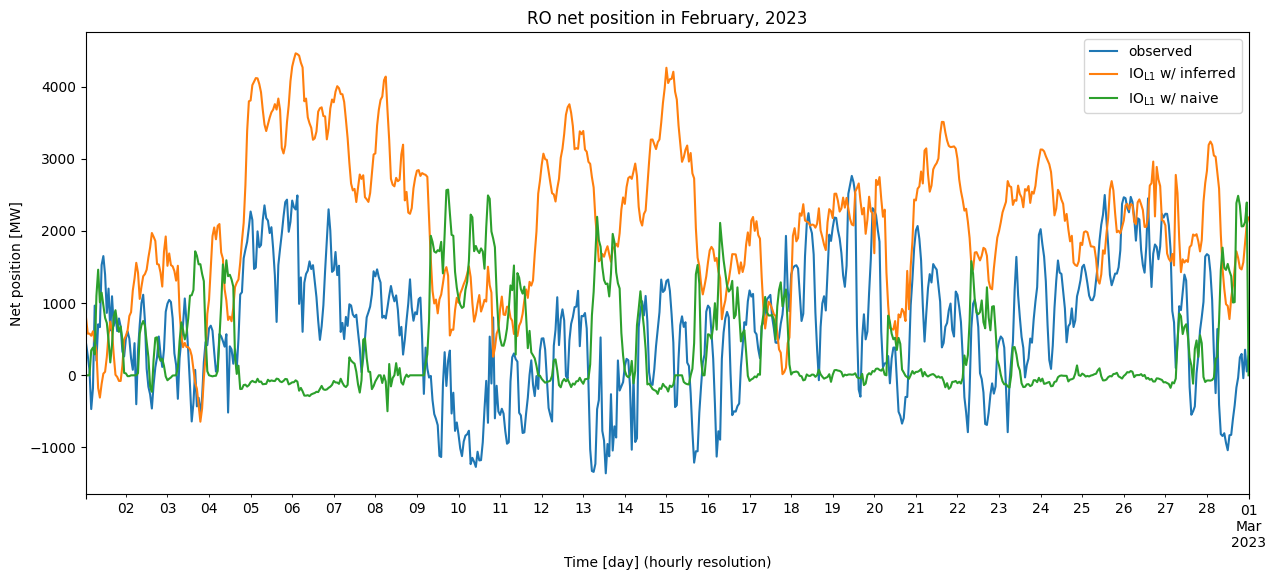

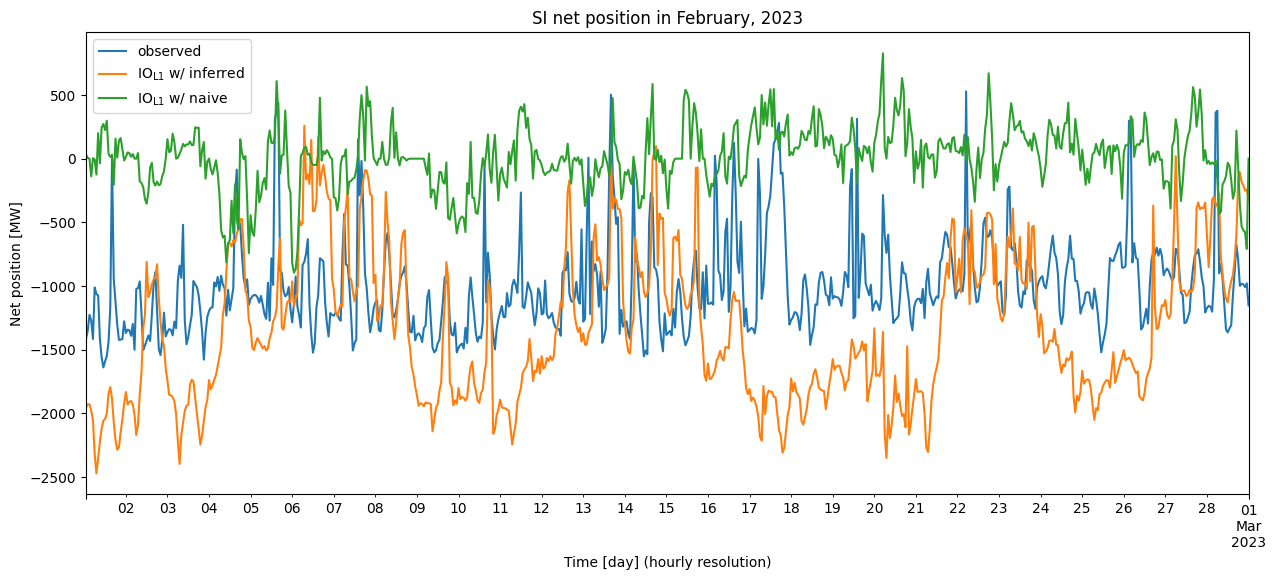

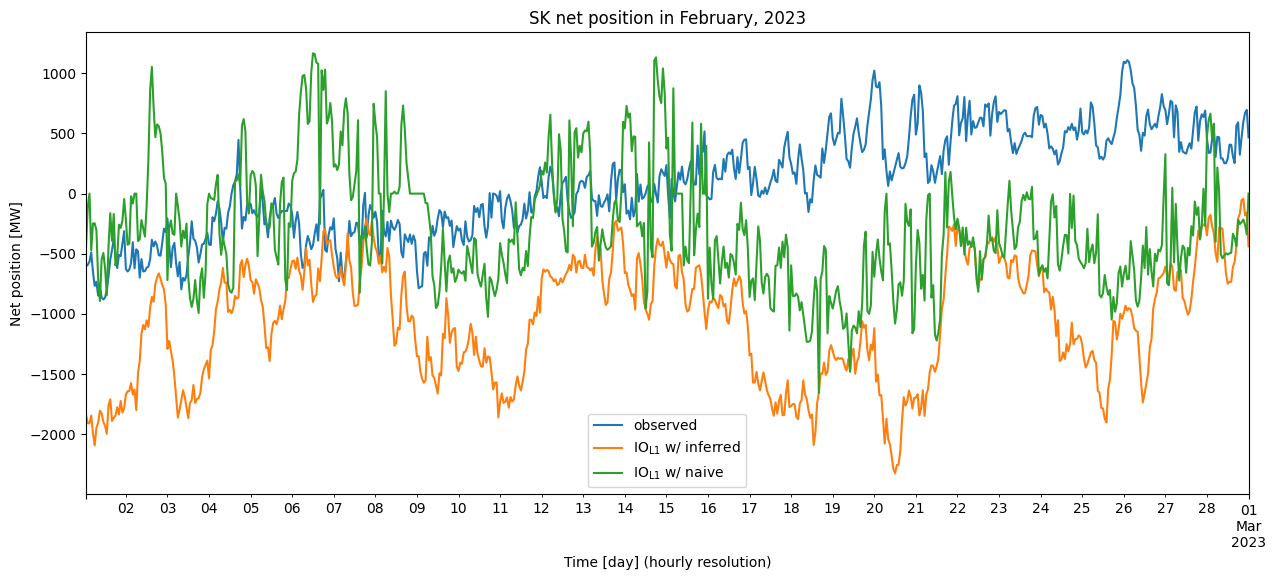

In [3]:
for zone in countries:
    plt.figure(figsize=(15,6))
    ax = df_observed_february[zone].plot()
    
    # inferred, naive, commercial
    df_forecasts_february[1][zone].plot(ax=ax)
    df_forecasts_february[2][zone].plot(ax=ax)
    #df_forecasts_february[4][zone].plot(ax=ax)
    
    plt.title("{0} net position in February, 2023".format(zone))
    plt.ylabel('Net position [MW]')
    plt.xlabel('Time [day] (hourly resolution)')
    
    ax.legend([
        'observed', r'$\mathrm{IO_{L1}}$ w/ inferred', r'$\mathrm{IO_{L1}}$ w/ naive', 
        #'commercial'
    ])
    
    plt.show()

In [10]:
# FORECAST ERROR ANALYSIS

df_errors_inferred = df_forecasts_february[1][countries].copy()
df_errors_inferred = df_errors_inferred - df_observed_february[countries]
df_errors_inferred_rel = df_errors_inferred/df_observed_february[countries]

df_errors_naive = df_forecasts_february[2][countries].copy()
df_errors_naive = df_errors_naive - df_observed_february[countries]
df_errors_naive_rel = df_errors_naive/df_observed_february[countries]

#df_errors_vol = df_forecasts_february[4][countries].copy()
#df_errors_vol = df_errors_vol - df_observed_february[countries]
#df_errors_vol_rel = df_errors_vol/df_observed_february[countries]

In [11]:
print('L1 w/ inferred - MAE (MW): {0} (std. {1})'.format(abs(round(df_errors_inferred.stack().abs().mean(), 2)), abs(round(df_errors_inferred.stack().abs().std(), 2))))
print('L1 w/ naive - MAE (MW): {0} (std. {1})'.format(abs(round(df_errors_naive.stack().abs().mean(), 2)), abs(round(df_errors_naive.stack().abs().std(), 2))))
#print('Commercial - MAE (€/MWh): {0} (std. {1})'.format(abs(round(df_errors_vol.stack().abs().mean(), 2)), abs(round(df_errors_vol.stack().abs().std(), 2))))

L1 w/ inferred - MAE (MW): 2136.94 (std. 2170.81)
L1 w/ naive - MAE (MW): 1627.93 (std. 1719.45)


In [18]:
print('L1 w/ inferred - MRE (%): {0} (std. {1})'.format(abs(round(100*df_errors_inferred.stack().abs().mean()/df_observed_february[countries].stack().abs().mean(), 2)), abs(round(100*df_errors_inferred.abs().stack().std()/df_observed_february[countries].stack().abs().mean(), 2))))
print('L1 w/ naive - MRE (%): {0} (std. {1})'.format(abs(round(100*df_errors_naive.stack().abs().mean()/df_observed_february[countries].stack().abs().mean(), 2)), abs(round(100*df_errors_naive.stack().abs().std()/df_observed_february[countries].stack().abs().mean(), 2))))
#print('Commercial - MRE (%): {0} (std. {1})'.format(abs(round(100*df_errors_vol.stack().abs().mean()/df_observed_february[countries].stack().mean(), 2)), abs(round(100*df_errors_vol.stack().abs().std()/df_observed_february[countries].stack().mean(), 2))))

L1 w/ inferred - MRE (%): 114.33 (std. 116.14)
L1 w/ naive - MRE (%): 87.1 (std. 91.99)


Text(0.5, 0.98, 'Net position forecast errors in February, 2023')

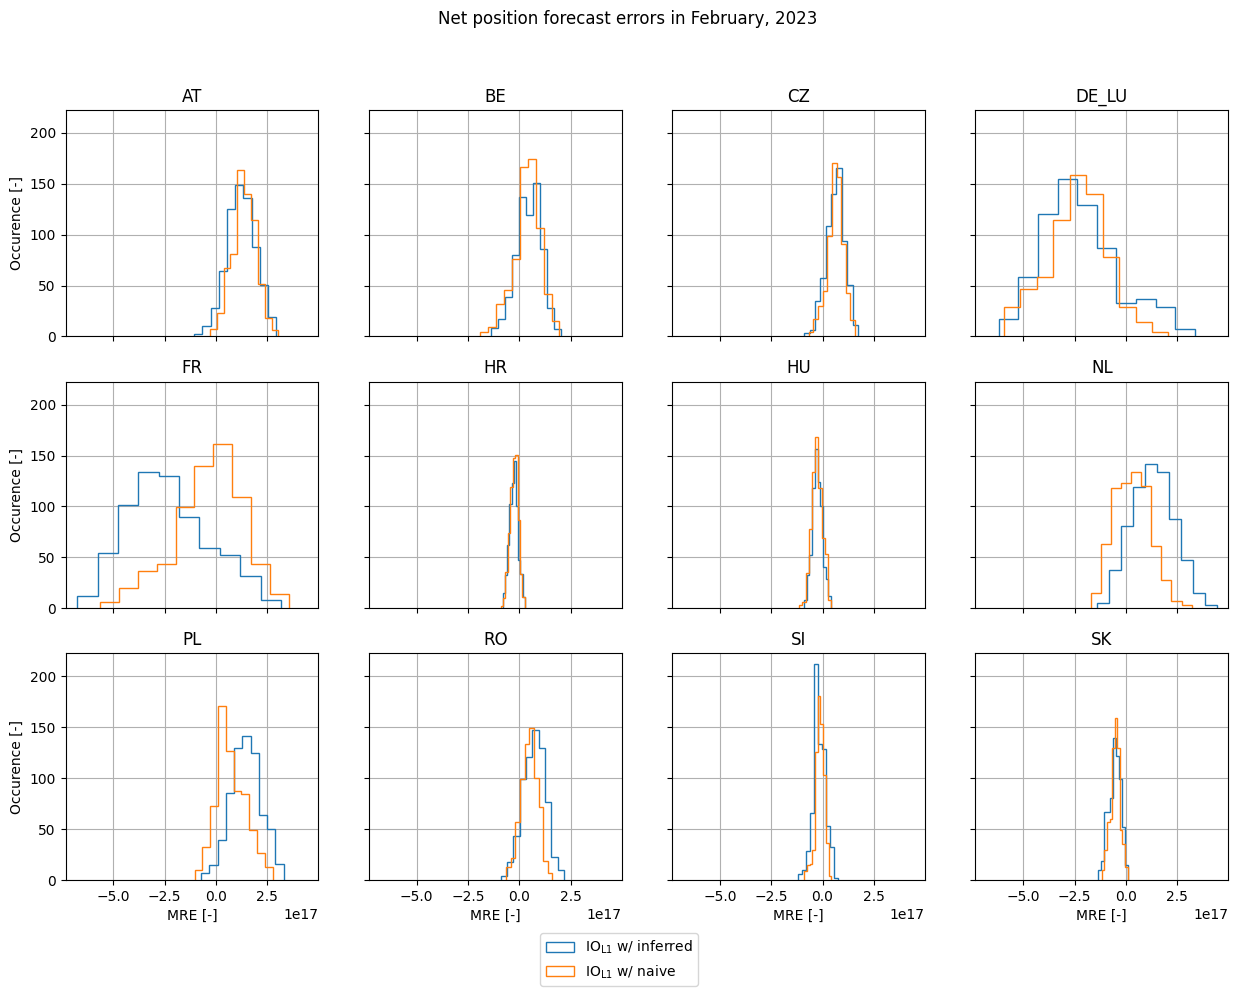

In [22]:
fig, axs = plt.subplots(3, 4, sharey=True, sharex=True, figsize=(15, 10))
zone_axs = [
    axs[0, 0], axs[0, 1], axs[0, 2], axs[0, 3],
    axs[1, 0], axs[1, 1], axs[1, 2], axs[1, 3],
    axs[2, 0], axs[2, 1], axs[2, 2], axs[2, 3],
]

for index, zone in enumerate(countries):
    #(df_errors_vol[zone]/df_observed_february[countries].stack().mean()).hist(ax=zone_axs[index], histtype='step')
    (df_errors_inferred[zone]/df_observed_february[countries].stack().mean()).hist(ax=zone_axs[index], histtype='step')
    (df_errors_naive[zone]/df_observed_february[countries].stack().mean()).hist(ax=zone_axs[index], histtype='step')
    zone_axs[index].set_title(zone)
    
for ax in axs.flat:
    ax.set(xlabel='MRE [-]', ylabel='Occurence [-]')

for ax in axs.flat:
    ax.label_outer()

fig.legend([
    #'commercial', 
    r'$\mathrm{IO_{L1}}$ w/ inferred', r'$\mathrm{IO_{L1}}$ w/ naive'\
], loc='lower center')
fig.suptitle('Net position forecast errors in February, 2023')